In [28]:
#importing libs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math

In [29]:
df = pd.read_csv("Laliga.csv")

In [30]:
df.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19
0,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1


In [31]:
#making first row as header
new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [32]:
df.head()

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [33]:
df.isnull().sum()

0
Pos              0
Team             0
Seasons          0
Points           0
GamesPlayed      0
GamesWon         0
GamesDrawn       0
GamesLost        0
GoalsFor         0
GoalsAgainst     0
Champion         0
Runner-up        0
Third            0
Fourth           0
Fifth            0
Sixth            0
T                0
Debut            0
Since/LastApp    0
BestPosition     0
dtype: int64

In [34]:
def removeHyphen(col):
  print(col)
  df[str(col)] = df[str(col)].map(lambda x: x.replace('-','0')).astype(int)

In [35]:
#remove hyphen from all the columsn other than debut and Since/LastApp
for x in df.columns:
  if(x!="Debut" and x!="Since/LastApp" and x!="Team"):
    removeHyphen(x)

Pos
Seasons
Points
GamesPlayed
GamesWon
GamesDrawn
GamesLost
GoalsFor
GoalsAgainst
Champion
Runner-up
Third
Fourth
Fifth
Sixth
T
BestPosition


In [36]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002-03,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931-32,1987-88,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934-35,2001-02,1
7,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994-95,3
8,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010-11,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939-40,2012-13,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932-33,2015-16,1


In [37]:
#handle - of debut and Since/LastApp
df['Debut'] = df['Debut'].astype(str).str[:4].astype(int)
df['Since/LastApp'] = df['Since/LastApp'].astype(str).str[:4].astype(int)

In [38]:
df

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,1,4,4,5,12,6,32,1934,2001,1
7,7,Espanyol,82,2792,2626,948,608,1070,3609,3889,0,0,4,5,2,5,16,1929,1994,3
8,8,Real Sociedad,70,2573,2302,864,577,861,3228,3230,2,3,2,5,4,3,19,1929,2010,1
9,9,Zaragoza,58,2109,1986,698,522,766,2683,2847,0,1,4,5,4,4,18,1939,2012,2
10,10,Real Betis,51,1884,1728,606,440,682,2159,2492,1,0,2,3,4,4,14,1932,2015,1


In [16]:
#Question1: started playing 1930-1980
df_new = df[df['Debut'].between(1930, 1980)]
df_new['Team']

4                Valencia
6                 Sevilla
9                Zaragoza
10             Real Betis
11    Deportivo La Coruna
12             Celta Vigo
13             Valladolid
15         Sporting Gijon
16                Osasuna
17                 Malaga
18                 Oviedo
19               Mallorca
20             Las Palmas
22                Granada
23         Rayo Vallecano
24                  Elche
26               Hercules
27               Tenerife
28                 Murcia
29                 Alaves
30                Levante
31              Salamanca
32               Sabadell
33                  Cadiz
35              Castellon
38                Cordoba
40             Recreativo
41              Burgos CF
42             Pontevedra
47              Gimnastic
50               Alcoyano
51                   Jaen
53             AD Almeria
55                 Lleida
58                 Condal
59        Atletico Tetuan
60       Cultural Leonesa
Name: Team, dtype: object

In [10]:
#Question2: Top 5 teams in points
df.nlargest(5,'Points')

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,Champion,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,33,23,8,8,3,4,79,1929,1929,1
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,25,25,12,12,4,6,83,1929,1929,1
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,10,8,16,9,7,6,56,1929,2002,1
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,6,6,10,11,10,7,50,1931,1987,1
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,8,7,10,5,8,10,49,1929,1929,1


In [11]:
#Question3: Wining percentage distribution
df['WinningPercent'] = (df['GamesWon']/df['GamesPlayed'])*100

In [12]:
#top 5 in wining percent
df.nlargest(5,'WinningPercent')

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,WinningPercent
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1987,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629


In [13]:
dfPlot = df['WinningPercent'].dropna()

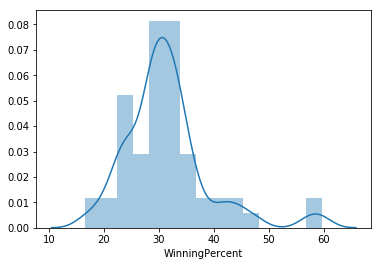

In [21]:
sns.distplot(dfPlot)

In [14]:
#Question 4
df.nlargest(7,'WinningPercent')
#YEs there is a significant difference of around 18%

,Pos,Team,Seasons,Points,GamesPlayed,GamesWon,GamesDrawn,GamesLost,GoalsFor,GoalsAgainst,...,Runner-up,Third,Fourth,Fifth,Sixth,T,Debut,Since/LastApp,BestPosition,WinningPercent
1,1,Real Madrid,86,4385,2762,1647,552,563,5947,3140,...,23,8,8,3,4,79,1929,1929,1,59.630702
2,2,Barcelona,86,4262,2762,1581,573,608,5900,3114,...,25,12,12,4,6,83,1929,1929,1,57.241130
3,3,Atletico Madrid,80,3442,2614,1241,598,775,4534,3309,...,8,16,9,7,6,56,1929,2002,1,47.475134
4,4,Valencia,82,3386,2664,1187,616,861,4398,3469,...,6,10,11,10,7,50,1931,1987,1,44.557057
5,5,Athletic Bilbao,86,3368,2762,1209,633,920,4631,3700,...,7,10,5,8,10,49,1929,1929,1,43.772629
21,21,Villarreal,17,970,646,266,172,208,892,789,...,1,1,2,3,2,9,1998,2013,2,41.176471
6,6,Sevilla,73,2819,2408,990,531,887,3680,3373,...,4,4,5,12,6,32,1934,2001,1,41.112957


In [15]:
#Section 2
#Question 1
mu = 140
sigma = 25
n = 200
SE = sigma/math.sqrt(200)
SE

#the standard error is very small compared with the mean. This indicates that the variability of values within the sample is relatively small

1.7677669529663687

In [24]:
#Question 2- 95% confidence interval

LCI_POP, UCI_POP = stats.norm.interval(0.95, loc = mu, scale=SE)
print('The interval %1.4f to %1.4f'%(LCI_POP,UCI_POP))
intervalDiff = UCI_POP-LCI_POP
intervalDiff

The interval 136.5352 to 143.4648


6.929519121748399

In [25]:
#Question 3 - 95% confidence interval with 100 sample
SE = sigma/math.sqrt(100)
LCI_POP, UCI_POP = stats.norm.interval(0.95, loc = mu, scale=SE)
print('The interval %1.4f to %1.4f'%(LCI_POP,UCI_POP))
intervalDiff = UCI_POP-LCI_POP
intervalDiff

The interval 135.1001 to 144.8999


9.799819922700294

In [0]:
#with 100 sample of same mean interval is wider

In [0]:
#Question 4

#From the error formula we can see that as the samplesize (n) increases, the standard error of the mean(SEM) decreases.

In [16]:
#Section 3
df = pd.read_csv('Golf.csv')

In [17]:
df.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [18]:
df.shape

(40, 2)

In [74]:
#Question 1,2
#We will use two sample t test
from scipy.stats import ttest_ind
ttest,pval = ttest_ind(df['Current'],df['New'])
print("p-value",pval)

if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")
  
#mean driving distance for two balls are equal

p-value 0.18793228491854663
we accept null hypothesis


In [20]:
#Question 3
s_cur = df.Current.std()/np.sqrt(len(df.Current))
s_new = df.New.std()/np.sqrt(len(df.New))
LCI_cur,UCI_cur = stats.norm.interval(0.95,loc=df.Current.mean(),scale=s_cur)
LCI_new,UCI_new = stats.norm.interval(0.95,loc=df.New.mean(),scale=s_new)

print("The 95 percent Confidence Interval for Current Balls is from %1.4f to %1.4f"%(LCI_cur,UCI_cur))
print("The 95 percent Confidence Interval for New Balls is from %1.4f to %1.4f"%(LCI_new,UCI_new))

The 95 percent Confidence Interval for Current Balls is from 267.5625 to 272.9875
The 95 percent Confidence Interval for New Balls is from 264.4330 to 270.5670


In [21]:
z = 1.96 # This is because the z score value for 95% Conf Interval is 1.96
x1 = df.Current.mean()
x2 = df.New.mean()
sigma1 = df.Current.std()
sigma2 = df.New.std()
n1 = n2 =40

In [22]:
a = x1-x2
a

2.7749999999999773

In [24]:
#This means the average for Current balls minus the average for New balls is positive,
#making Current balls the larger of the two varieties, in terms of this sample

In [25]:
dr = np.sqrt(((sigma1**2)/n1)+((sigma2**2)/n2))

In [26]:
err = 1.96*dr
err

4.094517657325933

In [27]:
upper = a+err
lower = a-err
print(upper,lower)

6.86951765732591 -1.3195176573259557


In [ ]:
#To interpret these results in the context of the problem,
#you can say with 95% confidence that the Current ball travels longer,
#on average, than the new ball, by somewhere between -1.319 and 6.869 yards, based on sample.